In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/check_Hc_BCS/1stRun/"

In [3]:
Hc_file = uproot.open(nfs_path + "allHc.root:variables;1")
df_Hc = Hc_file.arrays(library="pd")

In [19]:
df_Hc.shape[0]

129347

In [21]:
df_Hc["__event__"].nunique()

11917

In [22]:
print("Hc candidates per event:", round(df_Hc.shape[0]/df_Hc["__event__"].nunique(),2))

Hc candidates per event: 10.85


## save df

In [40]:
df_Hc.to_csv(nfs_path + "df_Hc.csv")

## load df

In [6]:
df_Hc = pd.read_csv(nfs_path + "df_Hc.csv")

## add labels

In [5]:
def hasBmother(s):
    hasBmother = 0

    abs_motherPDG = int(abs(s["genMotherPDG"]))
    
    if abs_motherPDG == 511:
        hasBmother = 1
    return hasBmother

df_Hc['hasBmother'] = df_Hc.apply(hasBmother, axis=1)

In [14]:
def hasBmother_and_isSig(s):
    hasBmother_and_isSig = 0

    if s["hasBmother"] == 1 and s["isSignalAcceptMissingNeutrino"] == 1:
        hasBmother_and_isSig = 1
    
    return hasBmother_and_isSig

df_Hc['hasBmother_and_isSig'] = df_Hc.apply(hasBmother_and_isSig, axis=1)

# Analysis

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

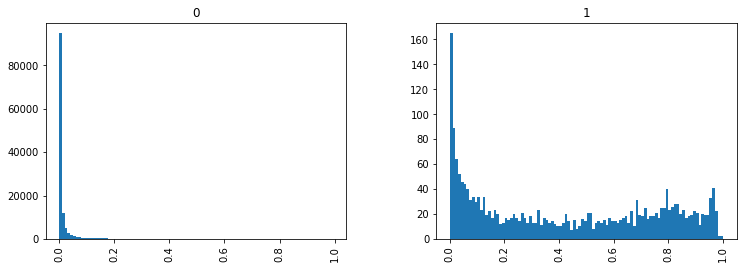

In [15]:
df_Hc.hist("sigProb", bins=100, figsize=(12,4), by="hasBmother_and_isSig")

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

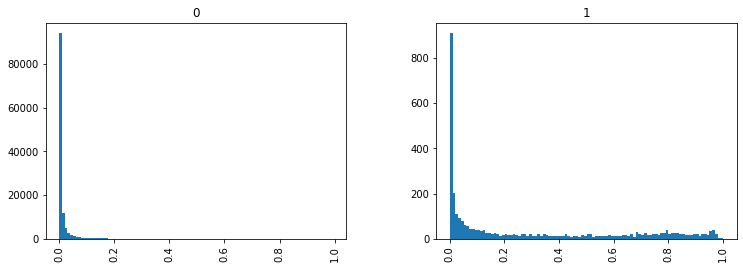

In [7]:
df_Hc.hist("sigProb", bins=100, figsize=(12,4), by="hasBmother")

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

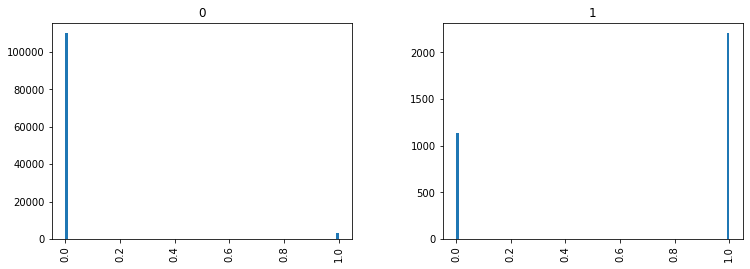

In [8]:
df_Hc.hist("isSignalAcceptMissingNeutrino", bins=100, figsize=(12,4), by="hasBmother")

In [9]:
df_Hc["genMotherPDG"].value_counts()

 0.0         101607
 300553.0     20222
-413.0         1802
 413.0         1783
-511.0         1698
 511.0         1645
-423.0          149
 423.0          140
-433.0           40
 415.0           32
 433.0           28
 10413.0         23
-10431.0         23
-415.0           19
 10431.0         19
 20413.0         14
-10413.0         13
-20413.0          9
 4112.0           9
 100443.0         8
 10411.0          8
 4212.0           7
-4212.0           6
-10411.0          6
 30443.0          6
 20443.0          5
 20433.0          4
-4214.0           3
-4114.0           3
 4222.0           2
-20433.0          2
 10433.0          2
-4314.0           1
 4314.0           1
 4114.0           1
 4224.0           1
 441.0            1
 4214.0           1
-421.0            1
 421.0            1
-4112.0           1
-4222.0           1
Name: genMotherPDG, dtype: int64

In [10]:
df_Hc["isSignalAcceptMissingNeutrino"].value_counts()

0.0    111089
1.0      5468
Name: isSignalAcceptMissingNeutrino, dtype: int64

In [11]:
df_Hc["hasBmother"].value_counts()

0    126004
1      3343
Name: hasBmother, dtype: int64

In [16]:
df_Hc["hasBmother_and_isSig"].value_counts()

0    127142
1      2205
Name: hasBmother_and_isSig, dtype: int64

In [12]:
df_Hc["mcPDG"].value_counts()

 300553.0    88817
 511.0       10135
-511.0       10087
 421.0        1644
-421.0        1625
 413.0        1030
-413.0         998
-411.0         812
 411.0         774
-431.0          97
 431.0          93
 443.0          65
-423.0          37
 4122.0         30
 423.0          30
 10413.0        28
-10413.0        25
 415.0          24
-20413.0        21
-415.0          20
-4122.0         18
 441.0          18
 100441.0       15
 30443.0        13
 20413.0        11
-10411.0         9
 20443.0         9
 433.0           7
 10441.0         6
 10431.0         6
-10431.0         5
 100443.0        5
 20213.0         5
-20433.0         4
-433.0           3
-20213.0         3
-44.0            3
 10433.0         3
 4132.0          2
 20433.0         2
-10433.0         2
 10411.0         2
 20113.0         2
 10313.0         1
 445.0           1
 113.0           1
 100323.0        1
-4132.0          1
-4332.0          1
 335.0           1
-2212.0          1
 44.0            1
-213.0      

In [18]:
N_events_total = df_Hc["__event__"].nunique()
for sigProb_cut in [0.1,0.01,0.001]:
    
    cut_df = df_Hc[df_Hc["sigProb"] > sigProb_cut]
    
    
    BCS = cut_df.sort_values("sigProb",ascending=False).drop_duplicates(subset=("__event__"), keep='first')

    isSig = cut_df.sort_values("hasBmother_and_isSig",ascending=False).drop_duplicates(subset=("__event__"), keep='first')

    
    
    print("sigProb_cut:",sigProb_cut, "BCS: mean of hasBmother_and_isSig:",round(BCS["hasBmother_and_isSig"].mean(),2))
    print("BCS: N =", BCS.shape[0], "frac. of evts:", round(BCS.shape[0]/N_events_total,2))
    
    print("selected basend hasBmother_and_isSig: mean of hasBmother_and_isSig:",round(isSig["hasBmother_and_isSig"].mean(),2))
    
    print("")

sigProb_cut: 0.1 BCS: mean of hasBmother_and_isSig: 0.29
BCS: N = 4560 frac. of evts: 0.38
selected basend hasBmother_and_isSig: mean of hasBmother_and_isSig: 0.34

sigProb_cut: 0.01 BCS: mean of hasBmother_and_isSig: 0.15
BCS: N = 9543 frac. of evts: 0.8
selected basend hasBmother_and_isSig: mean of hasBmother_and_isSig: 0.2

sigProb_cut: 0.001 BCS: mean of hasBmother_and_isSig: 0.12
BCS: N = 11917 frac. of evts: 1.0
selected basend hasBmother_and_isSig: mean of hasBmother_and_isSig: 0.17

